Query REF2014 data to generate field dataframe and plot some bar graphs.

In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import folium
import os
from branca.colormap import linear

In [2]:
units_of_assessment = ['Clinical Medicine', 'Public Health, Health Services and Primary Care',
        'Allied Health Professions, Dentistry, Nursing and Pharmacy',
        'Psychology, Psychiatry and Neuroscience', 'Biological Sciences',
        'Agriculture, Veterinary and Food Science',
        'Earth Systems and Environmental Sciences', 'Chemistry', 'Physics',
        'Mathematical Sciences', 'Computer Science and Informatics',
        'Aeronautical, Mechanical, Chemical and Manufacturing Engineering',
        'Electrical and Electronic Engineering, Metallurgy and Materials',
        'Civil and Construction Engineering', 'General Engineering',
        'Architecture, Built Environment and Planning',
        'Geography, Environmental Studies and Archaeology',
        'Economics and Econometrics', 'Business and Management Studies', 'Law',
        'Politics and International Studies', 'Social Work and Social Policy',
        'Sociology', 'Anthropology and Development Studies', 'Education',
        'Sport and Exercise Sciences, Leisure and Tourism', 'Area Studies',
        'Modern Languages and Linguistics', 'English Language and Literature',
        'History', 'Classics', 'Philosophy', 'Theology and Religious Studies',
        'Art and Design: History, Practice and Theory',
        'Music, Drama, Dance and Performing Arts',
        'Communication, Cultural and Media Studies, Library and Information Management']

uoa_report_count = [383,163,342,316,257,125,171,125,181,209,248,119,126,51,239,
            140,235,98,410,216,166,186,97,80,215,122,68,190,280,263,59,98,75,231,194,159]

query_df = pd.DataFrame({'uoa code':list(range(1,37)),'unit of assessment':units_of_assessment,'number of studies':uoa_report_count})
query_df = query_df.set_index(['uoa code'])

**GENERATE FIELDS DATAFRAME**

In [33]:
#list units of assessment for data extraction
extract_uoas = [24, 25, 26]
                        
uoa_list = []
for uoa in extract_uoas:
    uoa_list.extend([uoa]*query_df['number of studies'].loc[uoa])
ref_df = pd.DataFrame({'uoa':uoa_list})

In [34]:
#extract ImpactDetails, UnderpinningResearch or data from any other field:
'''CaseStudyId, Continent, Country, Funders, ImpactDetails, ImpactSummary, ImpactType, Institution, Institutions, 
Panel, PlaceName, References, ResearchSubjectAreas, Sources, Title UKLocation, UKRegion, UnderpinningResearch, UOA'''

field = input()
field_list = []
for uoa in tqdm(extract_uoas):
    url = requests.get('https://impact.ref.ac.uk/casestudiesapi/REFAPI.svc/SearchCaseStudies?UoA='+str(uoa)+'&format=JSON')
    data = url.json()
    for i in range(0,len(data)):
        field_list.append(data[i][field])
ref_df[field] = field_list
#data from field appended to ref_df dataframe

 Country


100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


**GENERATE BAR GRAPH OF IMPACT TYPES FOR UOA**

In [9]:
def uoaImpact(uoa):
    uoa_list = [uoa]*query_df['number of studies'].loc[uoa]
    ref_df = pd.DataFrame({'uoa':uoa_list})
    
    field_list = []
    url = requests.get('https://impact.ref.ac.uk/casestudiesapi/REFAPI.svc/SearchCaseStudies?UoA='+str(uoa)+'&format=JSON')
    data = url.json()
    for i in tqdm(range(0,len(data))):
        field_list.append(data[i]['ImpactType'])
    ref_df['ImpactType'] = field_list

    count_impact = ref_df.groupby('ImpactType').count()
    count_impact = count_impact.reset_index()
    
    x_pos = np.arange(len(count_impact['ImpactType']))
    y_axis = count_impact['uoa']
    color = ['orange']*1 + ['purple']*1 + ['darkturquoise']*1+ ['red']*1 +['blue']*1 + ['green']*1+['pink']*1 +['yellow']*1
    plt.figure(figsize=(10,10))
    plt.bar(x_pos, y_axis, color=color, align='center')
    plt.xticks(x_pos, count_impact['ImpactType'] ,rotation='vertical')
    plt.ylabel('Case Studies')
    plt.title('Impact type breakdown: '+query_df['unit of assessment'][uoa]+' ('+str(query_df['number of studies'][uoa])+' case studies)',fontsize=20)
          
    plt.show()

**GENERATE BAR GRAPH OF IMPACT TYPES FOR KEYWORD**

In [13]:
def keywordImpact():
    query = input('Enter keyword: ')
    impact_list = []
    url = requests.get('https://impact.ref.ac.uk/casestudiesapi/REFAPI.svc/SearchCaseStudies?phrase='+'\"'+query+'\"'+'&format=JSON')
    data = url.json()
    for i in tqdm(range(0,len(data))):
        impact_list.append(data[i]['ImpactType'])
    impact_df = pd.DataFrame({'impact type':impact_list})
    impact_scores = impact_df.reset_index().groupby('impact type').count().reset_index()

    x_pos = np.arange(len(impact_scores['impact type']))
    y_axis = impact_scores['index']
    color = ['orange']*1 + ['purple']*1 + ['darkturquoise']*1+ ['red']*1 +['blue']*1 + ['green']*1+['pink']*1 +['yellow']*1
    plt.figure(figsize=(10,10))
    plt.bar(x_pos, y_axis, color=color, align='center')
    plt.xticks(x_pos, impact_scores['impact type'] ,rotation='vertical')
    plt.ylabel('Case Studies')
    plt.title('Impact type breakdown: '+query.upper()+' ('+str(sum(impact_scores['index']))+' case studies)',fontsize=20)

    plt.show()

Enter keyword:  knowledge


100%|██████████| 3001/3001 [00:00<00:00, 725230.83it/s]


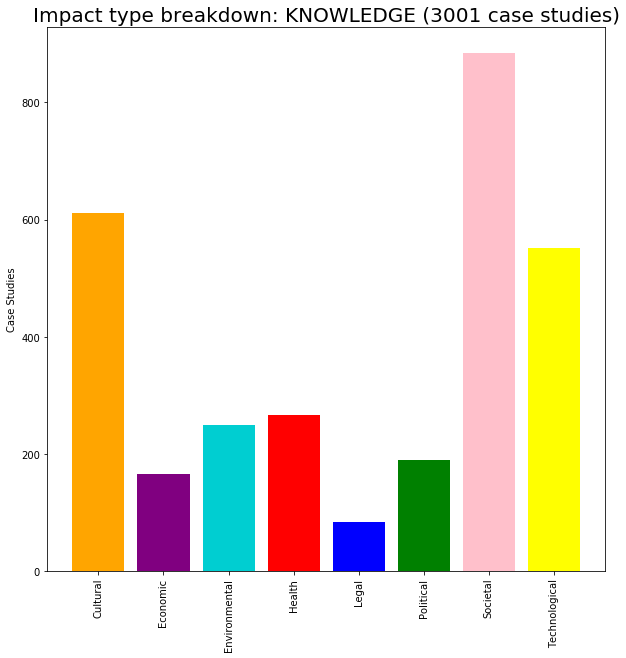

In [19]:
keywordImpact()

Enter keyword:  innovation


100%|██████████| 1477/1477 [00:00<00:00, 574460.96it/s]


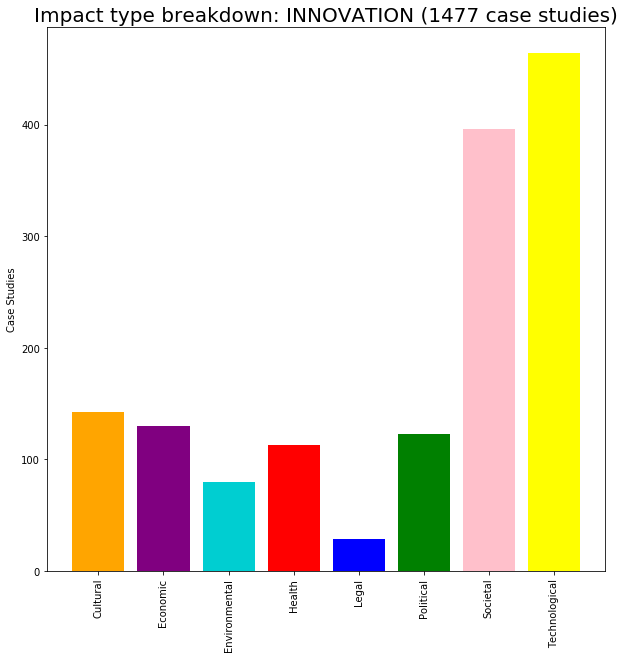

In [26]:
keywordImpact()

Enter keyword:  policy


100%|██████████| 3631/3631 [00:00<00:00, 897014.83it/s]


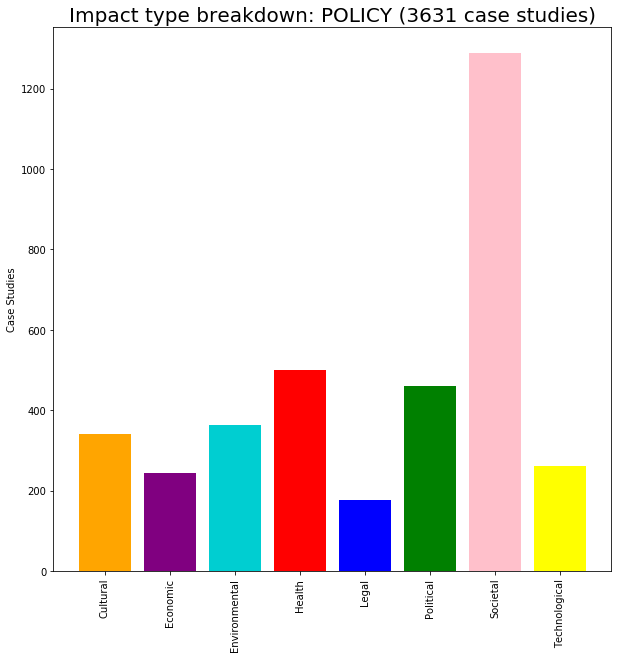

In [14]:
keywordImpact()

Enter keyword:  HIV


100%|██████████| 146/146 [00:00<00:00, 320108.93it/s]


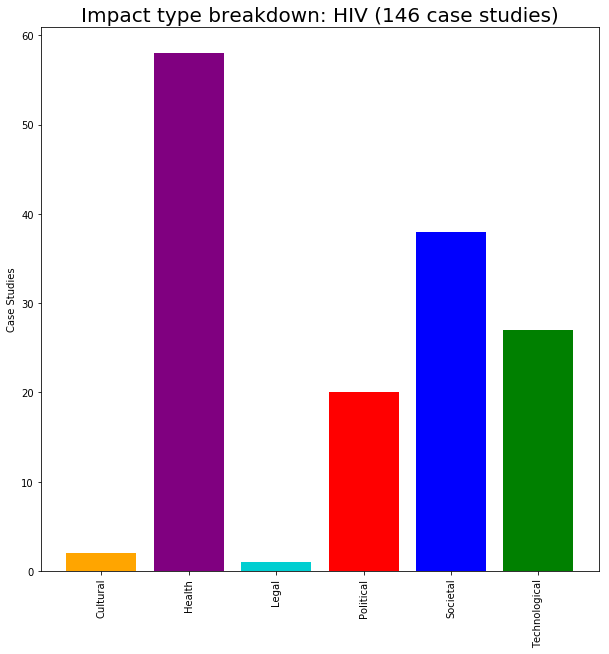

In [21]:
keywordImpact()

Enter keyword:  mental health


100%|██████████| 364/364 [00:00<00:00, 330675.04it/s]


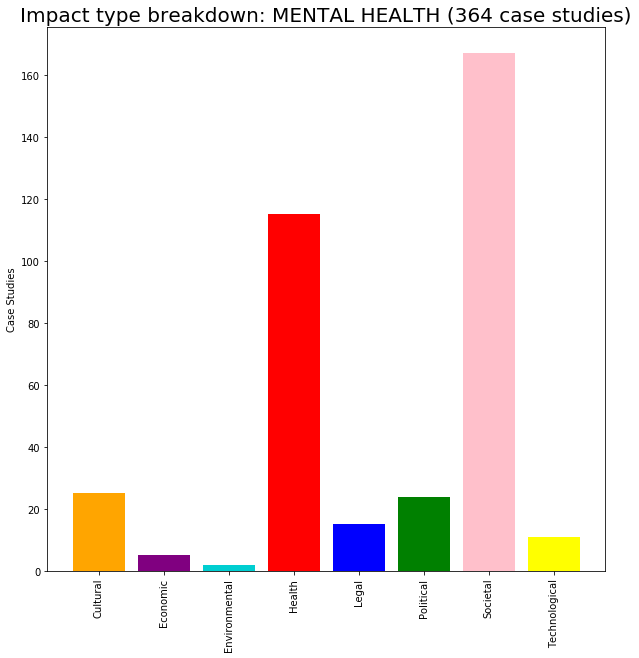

In [22]:
keywordImpact()

Enter keyword:  health


100%|██████████| 2704/2704 [00:00<00:00, 888406.55it/s]


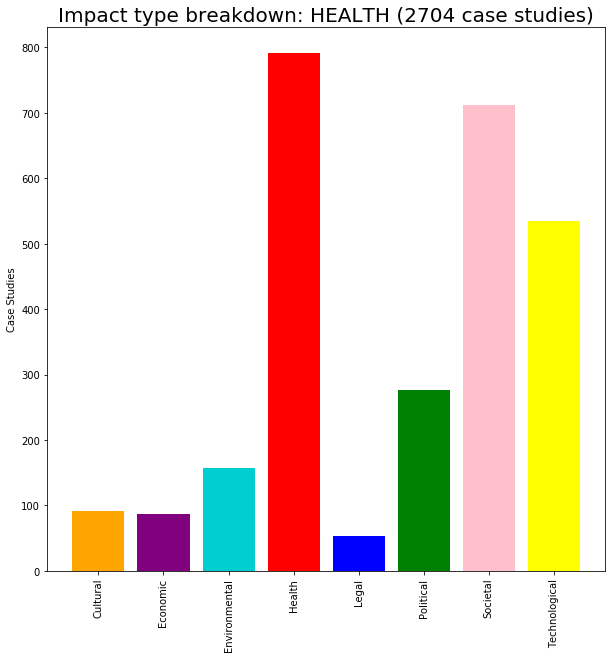

In [48]:
keywordImpact()